<a href="https://colab.research.google.com/github/melativj/H8_PTP_FINAL_IMAGE/blob/master/CatDog_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##Import packages yang dibutuhkan
from numpy import asarray
from numpy import save

from matplotlib.image import imread
from PIL import Image
import IPython.display as display

import tensorflow as tf

import matplotlib.pyplot as plt
import math
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
##Download dataset yang diberikan melalui link _URL
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
## Mengestrak dataset yg telah didownload
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # direktori data training gambar kucing
train_dogs_dir = os.path.join(train_dir, 'dogs')  # direktori data training gambar anjing
validation_cats_dir = os.path.join(validation_dir, 'cats')  # direktori data validasi gambar kucing
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # direktori data validasi gambar anjing

In [47]:
## Menghitung jumlah data traning & validasi
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("---")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
---
Total training images: 2000
Total validation images: 1000


In [0]:
# Mendefinisikan Nama Kelas
class_names=['Cat','Dog']

In [0]:
### INISIALISASI

batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [52]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

for image, label in train_data_gen:
  break
  
for image_test, label_test in val_data_gen:
  break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
# Melihat Data Gambar
image

array([[[[0.8196079 , 0.50980395, 0.2784314 ],
         [0.69411767, 0.3921569 , 0.17254902],
         [0.68235296, 0.38431376, 0.19215688],
         ...,
         [0.76470596, 0.52156866, 0.3372549 ],
         [0.7372549 , 0.48627454, 0.29803923],
         [0.7607844 , 0.5019608 , 0.30588236]],

        [[0.8431373 , 0.53333336, 0.3019608 ],
         [0.69411767, 0.3921569 , 0.17254902],
         [0.6666667 , 0.36862746, 0.1764706 ],
         ...,
         [0.76470596, 0.52156866, 0.3372549 ],
         [0.75294125, 0.5019608 , 0.3137255 ],
         [0.7725491 , 0.5137255 , 0.31764707]],

        [[0.8313726 , 0.52156866, 0.2901961 ],
         [0.70980394, 0.40784317, 0.18823531],
         [0.6784314 , 0.3803922 , 0.18823531],
         ...,
         [0.77647066, 0.53333336, 0.34901962],
         [0.77647066, 0.5254902 , 0.3372549 ],
         [0.7803922 , 0.52156866, 0.3254902 ]],

        ...,

        [[0.81568635, 0.74509805, 0.65882355],
         [0.8078432 , 0.7372549 , 0.6509804 ]

In [54]:
# Melihat Data Label
label

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1.], dtype=float32)

<function matplotlib.pyplot.show>

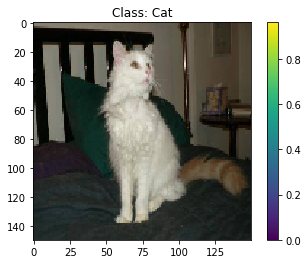

In [55]:
# Melihat Data dalam bentuk plot gambar
image = image[1]    
lbl = label[1]

plt.figure()
plt.imshow(image)
plt.title("Class: {}".format(class_names[int(lbl)]))
plt.colorbar()
plt.grid(False)
plt.show

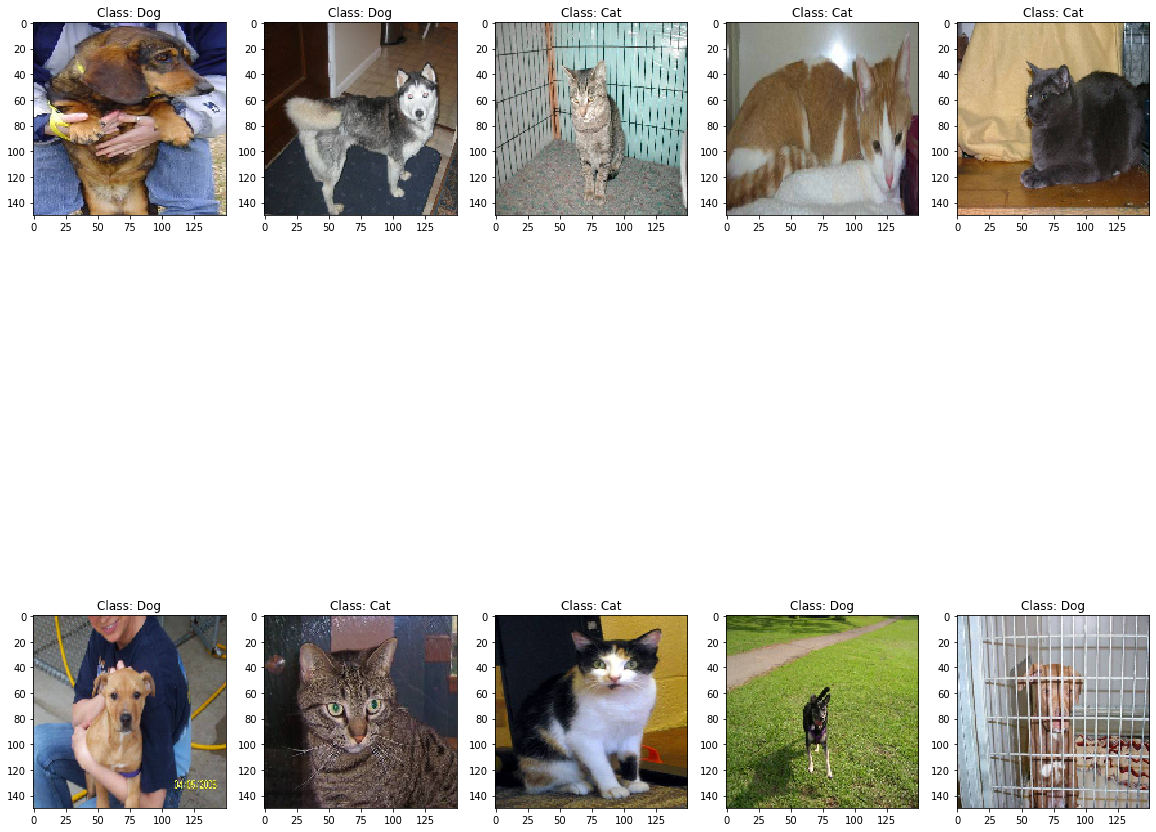

In [56]:
# Membuat definisi fungsi untuk membuat plot dengan bentuk 2 baris dan 5 kolom gambar beserta label datanya
def plotImages(images_arr, label_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, lbl, ax in zip( images_arr, label_arr, axes):
        ax.imshow(img)
        ax.axis()
        no_lbl = int(lbl)
        #ax.subplots_adjust(wspace=.5, hspace=.5)
        ax.set_title("Class: {}".format(class_names[no_lbl]))
    #plt.tight_layout()
    #plt.subplots_adjust(wspace=.5, hspace=.5)
    plt.show()

# Mengambil secara acak sample data training
sample_training_images, sample_training_label = next(train_data_gen)

# Memplot data dengan definisi fungsi yang telah dibuat
plotImages(sample_training_images[:10], sample_training_label[:10]) 

## MEMBUAT MODEL

In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20736)            

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])


In [60]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
15/15 [==============================] - 8s 521ms/step - loss: 0.9699 - acc: 0.4818 - val_loss: 0.7080 - val_acc: 0.5056
Epoch 2/10
15/15 [==============================] - 8s 508ms/step - loss: 0.6938 - acc: 0.5171 - val_loss: 0.6761 - val_acc: 0.5502
Epoch 3/10
15/15 [==============================] - 8s 500ms/step - loss: 0.6506 - acc: 0.6111 - val_loss: 0.6246 - val_acc: 0.6775
Epoch 4/10
15/15 [==============================] - 7s 494ms/step - loss: 0.5976 - acc: 0.6693 - val_loss: 0.5989 - val_acc: 0.6875
Epoch 5/10
15/15 [==============================] - 7s 493ms/step - loss: 0.5459 - acc: 0.7250 - val_loss: 0.5732 - val_acc: 0.7109
Epoch 6/10
15/15 [==============================] - 7s 496ms/step - loss: 0.4877 - acc: 0.7769 - val_loss: 0.5656 - val_acc: 0.7054
Epoch 7/10
15/15 [==============================] - 7s 490ms/step - loss: 0.4492 - acc: 0.7863 - val_loss: 0.6256 - val_acc: 0.6775
Epoch 8/10
15/15 [==============================] - 7s 475ms/step - loss: 0.

Visualize training results

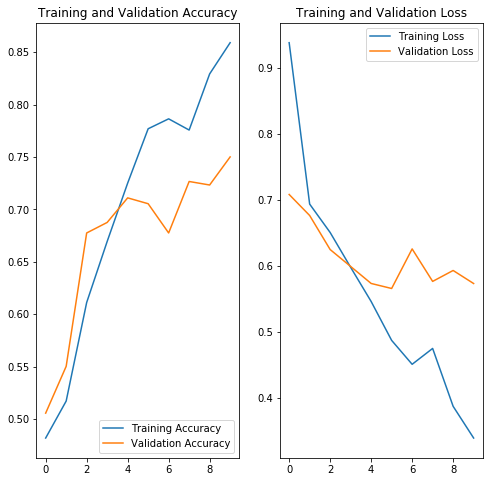

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## PREDIKSI

0


<function matplotlib.pyplot.show>

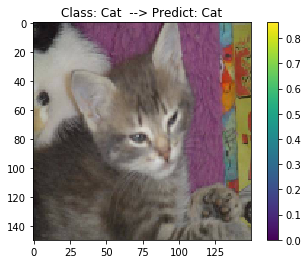

In [103]:
for image_test, label_test in val_data_gen:
  break

result = model.predict(x = image_test)

import random
rnd = random.randrange(128)
test_1 = image_test[rnd]
lbl_1 = label_test[rnd]
lbl_pred_1 = np.argmax(result[rnd])


print(lbl_pred_1)

plt.figure()
plt.imshow(test_1)
plt.title("Class: {}  --> Predict: {}".format(class_names[int(lbl_1)], class_names[lbl_pred_1]))
plt.colorbar()
plt.grid(False)
plt.show

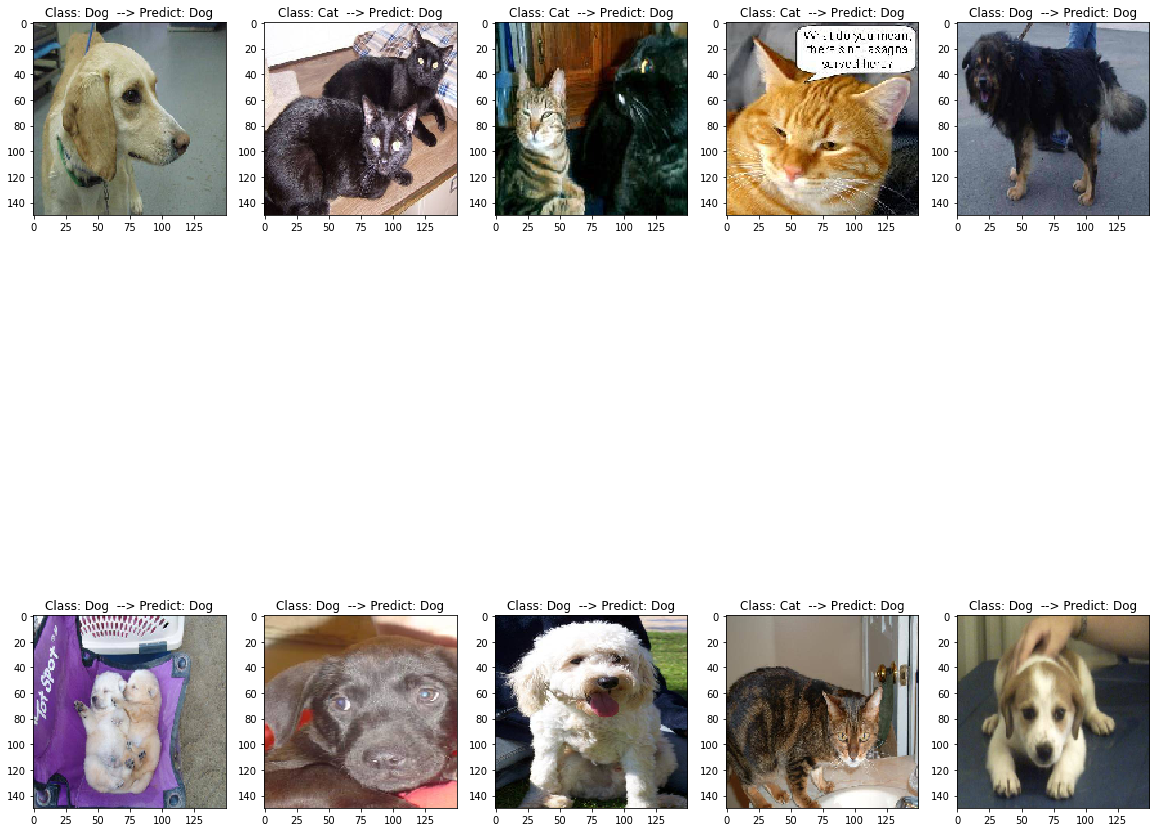

In [96]:
# Membuat definisi fungsi untuk membuat plot dengan bentuk 2 baris dan 5 kolom gambar beserta label datanya
def plotImages(images_arr, label_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, lbl, ax in zip( images_arr, label_arr, axes):
        #result_2 = model.predict(x = img)
        #lbl_pred = np.argmax(result_2)
        ax.imshow(img)
        ax.axis()
        #ax.subplots_adjust(wspace=.5, hspace=.5)
        
        ax.set_title("Class: {}  --> Predict: {}".format(class_names[int(lbl)], class_names[lbl_pred]))
        #ax.set_title("Class: {}".format(class_names[no_lbl]))
    #plt.tight_layout()
    #plt.subplots_adjust(wspace=.5, hspace=.5)
    plt.show()


# Memplot data dengan definisi fungsi yang telah dibuat
plotImages(image_test[:10], label_test[:10])